# Set-60 Model


## Build Set-60-Dataset

Copied 600 files to ../data/train_data_chest_xray_set_100/train/PNEUMONIA and 400 files to ../data/train_data_chest_xray_set_100/val/PNEUMONIA.
Copied 600 files to ../data/train_data_chest_xray_set_100/train/NORMAL and 400 files to ../data/train_data_chest_xray_set_100/val/NORMAL.


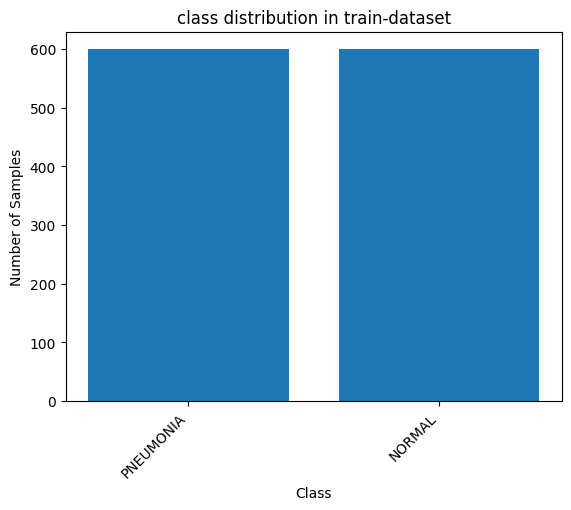

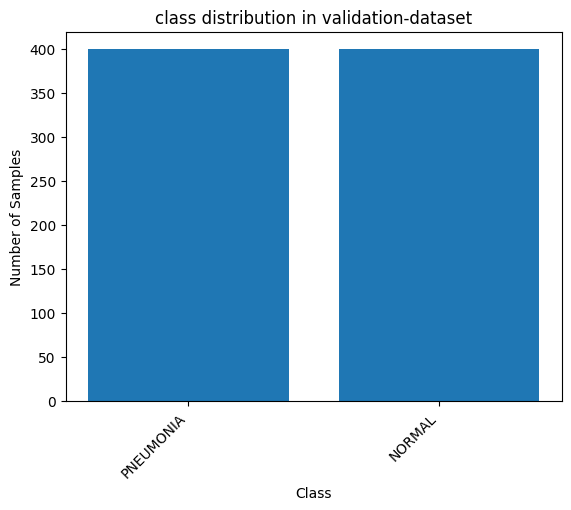

In [1]:
import shutil
import os
from dataset_splitter import copy_n_random_files
from plot_utils import plot_loss, plot_histogram_balance_of_dataset

train_data_dir = "../data/chest_xray/train/"
class1= "PNEUMONIA"
class2 = "NORMAL"
dest_folder1 = "../data/train_data_chest_xray_set_100"
dest_folder_train = os.path.join(dest_folder1, "train")
dest_folder_val = os.path.join(dest_folder1, "val")

train_split_ratio = 0.6

# Ensure folder is empty
if os.path.exists(dest_folder1):
    shutil.rmtree(dest_folder1)

copy_n_random_files(1000, os.path.join(train_data_dir, class1), os.path.join(dest_folder_train, class1), os.path.join(dest_folder_val, class1), train_split_ratio)
copy_n_random_files(1000, os.path.join(train_data_dir, class2), os.path.join(dest_folder_train, class2), os.path.join(dest_folder_val, class2), train_split_ratio)

plot_histogram_balance_of_dataset(dest_folder_train, "class distribution in train-dataset")
plot_histogram_balance_of_dataset(dest_folder_val, "class distribution in validation-dataset")

## Train Model

In [3]:
from model import Model

batch_size = 32
learning_rate = 1e-4
patience_early_stopping = 15
patience_reduce_learning_rate = 5
factor_reduce_learning_rate = 0.5
weight_decay = 1e-6
momentum = 0.9
epochs = 320
train_data_dir = dest_folder_train
val_data_dir = dest_folder_val
test_dir = "../data/chest_xray/test"

model = Model(learning_rate=learning_rate, batch_size=batch_size, patience_early_stopping=patience_early_stopping,
              patience_reduce_learning_rate=patience_reduce_learning_rate,
              factor_reduce_learning_rate=factor_reduce_learning_rate, train_dir=train_data_dir, val_dir=val_data_dir,
              weight_decay=weight_decay, momentum=momentum, test_dir=test_dir)

In [4]:
train_losses, val_losses = model.train_model(epochs)

Epoch 1/320, Train Loss: 0.6727, Val Loss: 0.6485, Learning Rate: 0.0001, Val ECE: 0.2711, Val MCE: 0.4438, Val Acc: 0.6038, Val F1: 0.5343
Epoch 2/320, Train Loss: 0.6226, Val Loss: 0.5935, Learning Rate: 0.0001, Val ECE: 0.3102, Val MCE: 0.4276, Val Acc: 0.8237, Val F1: 0.8203
Epoch 3/320, Train Loss: 0.5525, Val Loss: 0.5072, Learning Rate: 0.0001, Val ECE: 0.2626, Val MCE: 0.3238, Val Acc: 0.8875, Val F1: 0.8874
Epoch 4/320, Train Loss: 0.4527, Val Loss: 0.4040, Learning Rate: 0.0001, Val ECE: 0.1656, Val MCE: 0.3494, Val Acc: 0.9025, Val F1: 0.9022
Epoch 5/320, Train Loss: 0.3662, Val Loss: 0.3479, Learning Rate: 0.0001, Val ECE: 0.0994, Val MCE: 0.3284, Val Acc: 0.9137, Val F1: 0.9136
Epoch 6/320, Train Loss: 0.3328, Val Loss: 0.3286, Learning Rate: 0.0001, Val ECE: 0.0858, Val MCE: 0.3598, Val Acc: 0.9225, Val F1: 0.9225
Epoch 7/320, Train Loss: 0.3170, Val Loss: 0.3372, Learning Rate: 0.0001, Val ECE: 0.1001, Val MCE: 0.3267, Val Acc: 0.9300, Val F1: 0.9299
Epoch 8/320, Train L

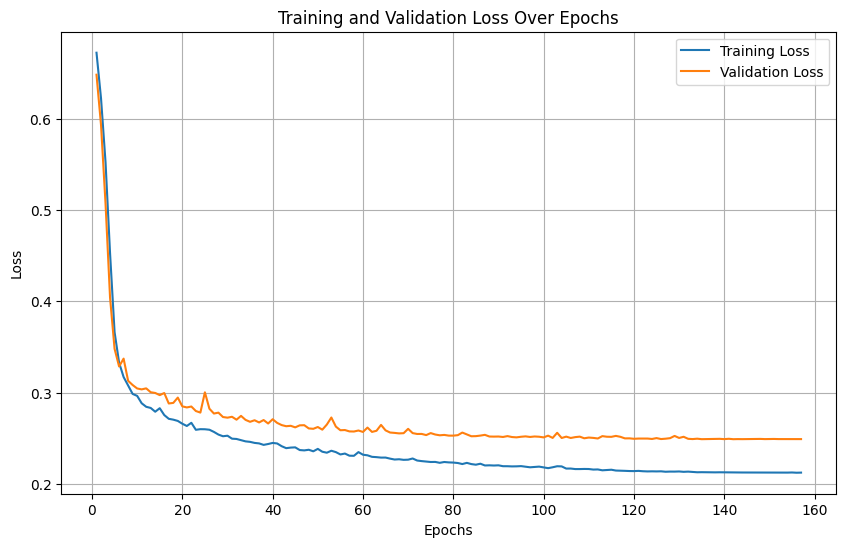

In [5]:
plot_loss(train_losses, val_losses)

In [6]:
import torch

torch.save(model.model.state_dict(), "../models/model_set_100.pth")